In [1]:
%%capture
%run 3.0_datapreparation.ipynb

KeyError: 'is_fraud'

KeyError: 'is_fraud'

In [2]:
X.shape, y.shape

((6362620, 10), (6362620,))

In [25]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)






# ### Data Analisy Libraries ###
import numpy as np
import pandas as pd
import pickle

# # ### Machine Learning Libraries ###
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, cross_validate
from sklearn.model_selection import train_test_split , GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


import warnings

from matplotlib import pyplot as plt


warnings.filterwarnings( 'ignore' )


# optuna 

# import optuna
# from optuna.samplers import TPESampler

# from optuna.pruners import SuccessiveHalvingPruner, HyperbandPruner
# optuna.logging.set_verbosity(optuna.logging.WARNING)
# # Import optuna.visualization
# import optuna.visualization as vis


# import xgboost as xgb



# # SHAP
# import shap

In [18]:

# Set class weights
# scale_pos_weight = (Número de exemplos negativos) / (Número de exemplos positivos)
class_weights = {0: 6354407, 1: 8213}  # Class 0: 1, Class 1: 10

# Set "scale_pos_weight" based on class balance
pos_weight = class_weights[0] / class_weights[1]

# # Train XGBoost model
# model = xgb.XGBClassifier(scale_pos_weight=pos_weight, class_weight=class_weights)
# model.fit(X_train, y_train)

In [19]:
pos_weight

773.7010836478753

In [20]:
from xgboost import XGBClassifier

In [21]:
def CM(y, prediction):
    print("Confusion Matrix:")
    labels = ["Conceder", "Negar"]
    cm = confusion_matrix(y, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="binary", values_format="d")  
    plt.show() 
    print("\n") 
    print("Metrics \n", classification_report(y,prediction))

In [22]:
def CVS(model, X, y):
    
    scoring = {'Accuracy': make_scorer(accuracy_score),
               'Precision': make_scorer(precision_score),
               'f1': make_scorer(f1_score),
               'Recall': make_scorer(recall_score)}
    
    y_pred = cross_val_predict(model, X, y, cv=Kfold, method='predict')
    print("\n")      
    CM(y,y_pred) 
    print("\n") 
   
    scores = cross_validate(model, X, y, cv = Kfold, scoring=scoring)
    for chave, valor in scores.items():
        print(f"{chave}\n{valor}, Mean: {valor.mean()} +/- {valor.std()}") 

In [23]:
number_folds = 4
Kfold = KFold(n_splits=number_folds, shuffle=True, random_state=seed)



Confusion Matrix:


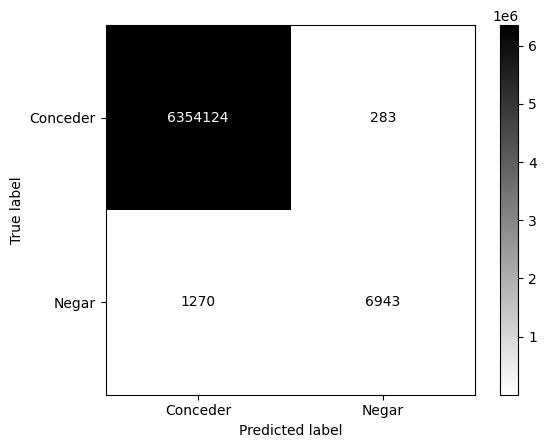



Metrics 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   6354407
           1       0.96      0.85      0.90      8213

    accuracy                           1.00   6362620
   macro avg       0.98      0.92      0.95   6362620
weighted avg       1.00      1.00      1.00   6362620



fit_time
[16.56932807 16.66931963 17.23330665 18.95144773], Mean: 17.355850517749786 +/- 0.9553650703714388
score_time
[2.43644309 2.16491675 2.08191347 2.20246863], Mean: 2.2214354872703552 +/- 0.13157580624422652
test_Accuracy
[0.99977179 0.99975985 0.99975042 0.99974162], Mean: 0.9997559181595003 +/- 1.1205314968677022e-05
test_Precision
[0.9592299  0.96857464 0.95704846 0.95864662], Mean: 0.9608749020017952 +/- 0.004516604325303954
test_f1
[0.90322581 0.90036515 0.89749548 0.89675961], Mean: 0.8994615125038526 +/- 0.00255695334466384
test_Recall
[0.8534005  0.8411306  0.84491979 0.84237848], Mean: 0.8454573436445959 +/- 0.004784946009841883


In [26]:
xgb = XGBClassifier(random_state=seed)
xgb.fit(X_train,y_train)
CVS(xgb, X, y)

In [27]:
fi_xgb = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)

fi_xgb.head(10)

,feature,importance
5,newbalance_orig,0.365844
4,oldbalance_org,0.189819
8,newbalance_dest,0.167985
1,type,0.161885
2,amount,0.061594
0,step,0.029216
7,oldbalance_dest,0.015097
3,name_orig,0.004361
6,name_dest,0.004199
9,is_flagged_fraud,0.000000


In [29]:
print(classification_report(y_val,xgb.predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.84      0.90      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.92      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



In [30]:
pos_weight

773.7010836478753



Confusion Matrix:


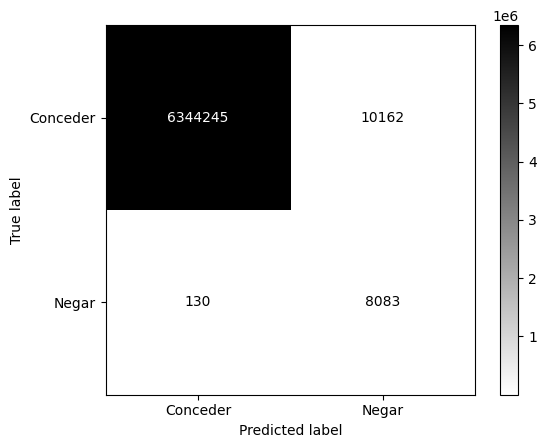



Metrics 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   6354407
           1       0.44      0.98      0.61      8213

    accuracy                           1.00   6362620
   macro avg       0.72      0.99      0.81   6362620
weighted avg       1.00      1.00      1.00   6362620



fit_time
[17.83136582 18.1633575  19.36132193 18.10036159], Mean: 18.364101707935333 +/- 0.5890909896812258
score_time
[2.23193097 1.99193335 2.54191375 2.35592413], Mean: 2.280425548553467 +/- 0.19978462725649498
test_Accuracy
[0.9983774  0.99837551 0.99843964 0.99833716], Mean: 0.9983824273648276 +/- 3.672487574471637e-05
test_Precision
[0.43365984 0.44153846 0.45270421 0.44416136], Mean: 0.4430159666520157 +/- 0.006798787539229902
test_f1
[0.60151305 0.60860345 0.6210687  0.61268121], Mean: 0.6109666036071418 +/- 0.00707012213739327
test_Recall
[0.9813602  0.97904483 0.98881867 0.98725814], Mean: 0.9841204611036884 +/- 0.004040396048176462


In [32]:
xgb = XGBClassifier(scale_pos_weight=pos_weight,random_state=seed)
xgb.fit(X_train,y_train)
CVS(xgb, X, y)

In [33]:
fi_xgb = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)

fi_xgb.head(10)

,feature,importance
5,newbalance_orig,0.790703
1,type,0.079246
4,oldbalance_org,0.067949
2,amount,0.033671
0,step,0.008308
9,is_flagged_fraud,0.007915
7,oldbalance_dest,0.005325
8,newbalance_dest,0.005118
6,name_dest,0.001011
3,name_orig,0.000753


In [34]:
print(classification_report(y_val,xgb.predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.44      0.98      0.61      1643

    accuracy                           1.00   1272524
   macro avg       0.72      0.99      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524

